# Classification of images of traffic lights and the light emitted by the sun and the moon


### Introduction

Tesla's cars Autopilot and Full Self-Driving (FSD) systems have had some issues distinguishing between the sun and traffic lights, particularly in certain lighting conditions. Especially, in some case, the sun may be misidentified as a traffic light. That's why, we need then to find a deep learning model to be able to clearly in identifying the traffic light without being misleaded by the sun or any other source of light and bright objects. For that, we will try to make a Convulutional Network model which can be implemented (update) on the on the Tesla's cars detection software.

This might be not that important matter or the most one among all predictions and models we can do for this World but a Tesla car crossing red traffic light can lead to accidents that would have been avoided ! Do you know why, if you get on a car accident because of that issue and die, you will ke make a whole family falling into a profound sorrow...

### Objective

That's why our objective is to design a deep learning model capable of accurately classifying images of “Traffic lights (red/orange lights)” and “Sun”.

### Description of the dataset

Our dataset contains :
 * `261` images of shinning sun
 * `181` images of bright moon
 * `157` images of yellow traffic light
 * `220` images of red traffic light.

# Importation of the necessary packages and librairies for the data study and conception of the model

In [ ]:
# Importations of the librairies
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import warnings

In [ ]:
# Input and output paths
input_folder = '/content/drive/MyDrive/tesla_dataset'  # Folder containing the original images
output_folder = 'proccessedTesla00'  # Folder to store the resized images

# Create the output folder if it doesn't exist
# exist_ok=True prevents an error if the folder already exists
os.makedirs(output_folder, exist_ok=True)

# Desired image size for resizing
target_size = (128, 128)
corrupted_images_count = 0  # Initialize a counter for corrupted images

# Process images in each subfolder (e.g., SUN, MOON, YELLOW, RED)
for category in ['SUN', 'MOON', 'YELLOW', 'RED']:
    input_path = os.path.join(input_folder, category)  # Path to the input subfolder
    output_path = os.path.join(output_folder, category)  # Path to the output subfolder

    # Create a subfolder for each category in the output folder
    os.makedirs(output_path, exist_ok=True)

    # Iterate through each file in the input subfolder
    for filename in glob.glob(os.path.join(input_path, '*.png')):  # Find all PNG images
        try:
            # Read the image using OpenCV (cv2)
            img = cv2.imread(filename)

            # Check if the image was loaded successfully
            if img is not None:
                # Resize the image to the target size
                img_resized = cv2.resize(img, target_size)

                # Generate the output filename
                output_file = os.path.join(output_path, os.path.basename(filename))

                # Save the resized image to the output folder
                cv2.imwrite(output_file, img_resized)
            else:
                # Increment the corrupted image counter if the image couldn't be loaded
                corrupted_images_count += 1
                # You might want to print a warning here:
                # print(f"Corrupted or unreadable image: {filename}")

        except Exception as e:
            # Print an error message if any exception occurs during processing
            print(f"Error processing {filename}: {e}")

In [ ]:
# To get a count of the number of corrupted images
corrupted_images_count

0

There are no corrupted images there. So no deal with corrupted images. Let's proceed to the creation of a dataset to load the images in batches.

In [ ]:
SUN_images = glob.glob(os.path.join('/content/proccessedTesla00/SUN', '*.png'))
SUN = pd.DataFrame({
    'name':SUN_images,
    'label':[0] * len(SUN_images),
    'img_size':[(128,128)] * len(SUN_images),
    'min_pixel':[0] * len(SUN_images),
    'max_pixel':[255]* len(SUN_images)

})
MOON_images = glob.glob(os.path.join('/content/proccessedTesla00/MOON', '*.png'))
MOON = pd.DataFrame({
    'name':MOON_images,
    'label':[1] * len(MOON_images),
    'img_size':[(128,128)] * len(MOON_images),
    'min_pixel':[0] * len(MOON_images),
    'max_pixel':[255]* len(MOON_images)

})

RED_images = glob.glob(os.path.join('/content/proccessedTesla00/RED', '*.png'))
RED = pd.DataFrame({
    'name':RED_images,
    'label':[2] * len(RED_images),
    'img_size':[(128,128)] * len(RED_images),
    'min_pixel':[0] * len(RED_images),
    'max_pixel':[255]* len(RED_images)

})

YELLOW_images = glob.glob(os.path.join('/content/proccessedTesla00/YELLOW', '*.png'))
YELLOW = pd.DataFrame({
    'name':YELLOW_images,
    'label':[3] * len(YELLOW_images),
    'img_size':[(128,128)] * len(YELLOW_images),
    'min_pixel':[0] * len(YELLOW_images),
    'max_pixel':[255]* len(YELLOW_images)

})

In [ ]:
def assign_train_test(df_class, train_ratio=0.8):
    train_size = int(len(df_class) * train_ratio)  # Número de datos para entrenamiento
    df_class = df_class.sample(frac=1, random_state=42)  # Mezclar los datos y saco una muestra de 100%
    df_class['set'] = ['train'] * train_size + ['test'] * (len(df_class) - train_size)
    return df_class

# Division of the differents records
SUNs = assign_train_test(SUN)
MOONs = assign_train_test(MOON)
REDs = assign_train_test(RED)
YELLOWs = assign_train_test(YELLOW)

In [ ]:
data = pd.concat([SUNs,MOONs,YELLOWs,REDs])
data = data.sample(frac=1).reset_index(drop=True) # mezclar el data set
data['label']=data['label'].map({0:'SUN',1:'MOON',2:'RED',3:'YELLOW'},)
data.head(11) # To show a preview of the first 11 data of the dataframe

name   label    img_size  \
0     /content/proccessedTesla00/RED/DDG_110.png     RED  (128, 128)   
1     /content/proccessedTesla00/SUN/DDG_108.png     SUN  (128, 128)   
2     /content/proccessedTesla00/SUN/DDG_392.png     SUN  (128, 128)   
3     /content/proccessedTesla00/MOON/PIX_70.png    MOON  (128, 128)   
4   /content/proccessedTesla00/YELLOW/DDG_73.png  YELLOW  (128, 128)   
5   /content/proccessedTesla00/YELLOW/PIX_46.png  YELLOW  (128, 128)   
6     /content/proccessedTesla00/SUN/DDG_107.png     SUN  (128, 128)   
7     /content/proccessedTesla00/SUN/PIX_191.png     SUN  (128, 128)   
8     /content/proccessedTesla00/SUN/PIX_202.png     SUN  (128, 128)   
9     /content/proccessedTesla00/MOON/PIX_67.png    MOON  (128, 128)   
10  /content/proccessedTesla00/YELLOW/DDG_53.png  YELLOW  (128, 128)   

    min_pixel  max_pixel    set  
0           0        255  train  
1           0        255  train  
2           0        255  train  
3           0        255  train  
4           0        255   test  
5           0        255  train  
6           0        255  train  
7           0        255  train  
8           0        255  train  
9           0        255  train  
10          0        255  train

In [ ]:
data.tail(11) # # To show a preview of the last 11 data of the dataframe

name   label    img_size  \
808      /content/proccessedTesla00/RED/DDG_90.png     RED  (128, 128)   
809   /content/proccessedTesla00/YELLOW/PIX_20.png  YELLOW  (128, 128)   
810     /content/proccessedTesla00/RED/DDG_299.png     RED  (128, 128)   
811  /content/proccessedTesla00/YELLOW/PIX_146.png  YELLOW  (128, 128)   
812     /content/proccessedTesla00/RED/PIX_229.png     RED  (128, 128)   
813     /content/proccessedTesla00/RED/DDG_100.png     RED  (128, 128)   
814    /content/proccessedTesla00/YELLOW/DDG_8.png  YELLOW  (128, 128)   
815    /content/proccessedTesla00/MOON/DDG_406.png    MOON  (128, 128)   
816     /content/proccessedTesla00/SUN/DDG_314.png     SUN  (128, 128)   
817     /content/proccessedTesla00/SUN/PIX_116.png     SUN  (128, 128)   
818     /content/proccessedTesla00/RED/DDG_207.png     RED  (128, 128)   

     min_pixel  max_pixel    set  
808          0        255  train  
809          0        255  train  
810          0        255  train  
811          0        255  train  
812          0        255  train  
813          0        255  train  
814          0        255  train  
815          0        255  train  
816          0        255  train  
817          0        255  train  
818          0        255  train

In [ ]:
# We count the number of each categories(SUN, RED, MOON, YELLOW)
print('Number of Categories',data.label.value_counts(),end='\n')
print('Number of',data.set.value_counts(),end='\n')

Number of Categories label
SUN       261
RED       220
MOON      181
YELLOW    157
Name: count, dtype: int64
Number of set
train    653
test     166
Name: count, dtype: int64


To see the obtained above distribution of the differents categories in a pie form :

<ipython-input-9-d3628f655a31>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = [data.set.value_counts()[0], data.set.value_counts()[1]]
<ipython-input-9-d3628f655a31>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = [data.set.value_counts()[0], data.set.value_counts()[1]]


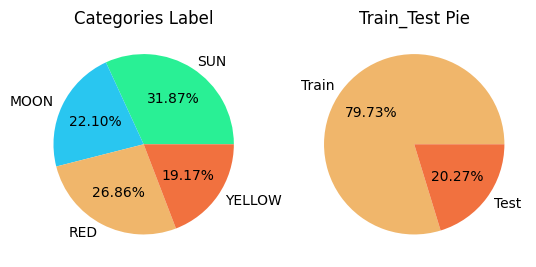

In [ ]:
plt.subplot(1, 2, 1)
options = ['SUN', 'MOON', 'RED', 'YELLOW']
count = data.label.value_counts().reindex(options).values

plt.pie(count, colors=["#29F095", "#29C6F0", "#F0B66B", "#F1713F"], labels=options, autopct="%0.2f%%")
plt.title("Categories Label")

plt.subplot(1, 2, 2)
options = ["Train", "Test"]
count = [data.set.value_counts()[0], data.set.value_counts()[1]]

plt.pie(count, colors=["#F0B66B", "#F1713F"], labels=options, autopct="%0.2f%%")
plt.title("Train_Test Pie")
plt.show()

The left plot shows that we have a "somewhat" balanced (it's a bit unbalanced tough, we'll see how to manage that after) data with :
* Sun : `31.87 %`
* Moon : `22.10 %`
* Red : `26.86 %`
* Yellow : `19.17 %`  

In the right plot we show how much data will be provided for training and for testing the model:
* Train : `79.73 %`
* Moon : `20.27 %`



In [ ]:
sample_files = data[['name', 'label']].sample(16, random_state=21)


random_files = []

for file in sample_files.iterrows():
    file_path, label  = os.path.join(file[1][0]), file[1][1]
    random_files = random_files + [(file_path, label)]

<ipython-input-10-4a3ed3a6e9bd>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_path, label  = os.path.join(file[1][0]), file[1][1]


In [ ]:
from PIL import Image
def display_images(random_files):

    N  = len(random_files)
    if N > 16:
        raise ValueError("N should be 16 or less to fit in a 6x6 grid.")

    # Set up the plot
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()

    # Hide any extra subplots
    for ax in axes[N:]:
        ax.axis('off')

    # Display each image
    for ax, image in zip(axes, random_files):
        image_path = image[0]
        label = image[1]

        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(label, fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

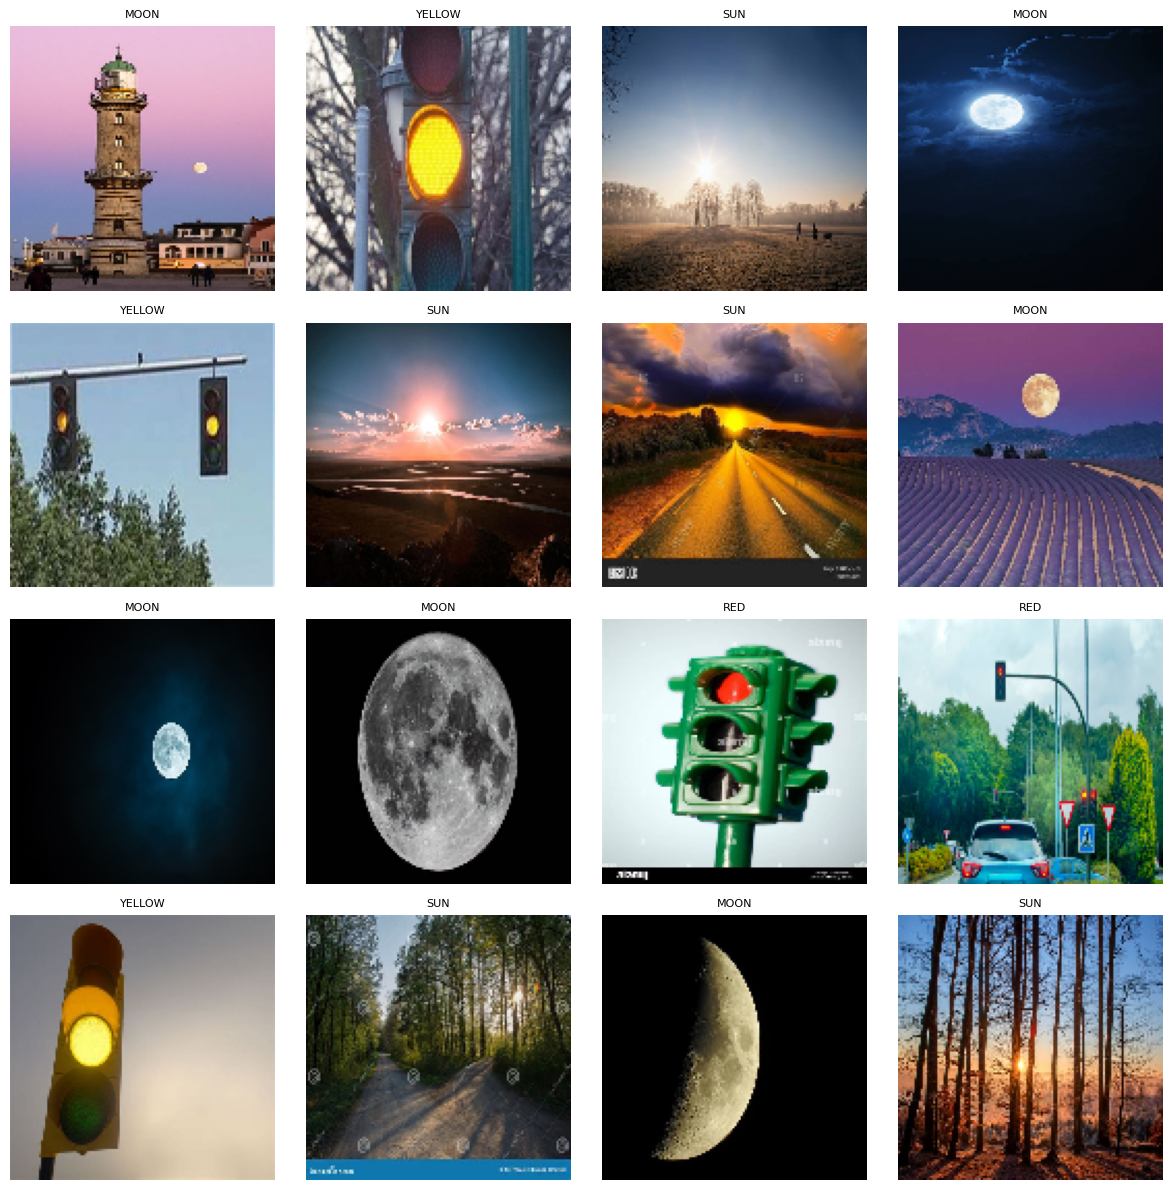

In [ ]:
# Displaying some random images of our data

display_images(random_files)

**Remarks**


The variability of the photos in pixels may make it difficult to train the models.
In addition we have photos where you can not see the whole body(for the moon or the sun for example) either by the focus of the photograph or by interaction with people or objects. Indeed, we also have some noise objects that can be hurdles for our model to train. In  fact, I am not sure if including the Moon was a good choice there.

In [ ]:
# machine learning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# neural networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import Adam


import random
import itertools


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# We use batches of data for the model for efficient (for example it will take less time for the model to train and improves the accuracy) deep learning with better convergence
batch_size = 36 # We use chunk of 36 images for each batch
image_size = 128 # images will be resized to a square with dimensions 128 pixels by 128 pixels
channels = 3 # the number of color channels in the images, which is typically 3 for RGB (Red, Green, Blue)

In [ ]:
# The dataset is split into the train data for the training of the model part and test data for testing the model
X_train = data[data['set']=='train'][['name', 'label']]
X_test = data[data['set']=='test'][['name', 'label']]

In [ ]:
# Shape of the training data X_train
X_train.shape

(653, 2)

In [ ]:
# Shape of the training data X_train
X_test.shape

(166, 2)

We have :

* X_Train has a shape (653, 2)
* X_Test has a shape (166, 2)

So, we have then have :

* X_Train = `79.731 %`
* X_Test = `20.512 %`

of our entire dataset.
This means we have gotten a good distribution of data. (This is common case).

In [ ]:
X_train, X_val = train_test_split(X_train, test_size=0.2, stratify=X_train['label'], random_state=21)

In [ ]:
# Let's read the data that we put in the batches
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = None,
                                                    x_col= 'name',
                                                    y_col= 'label',
                                                    class_mode='categorical',
                                                    batch_size = batch_size,
                                                    target_size = (image_size,image_size))

val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = None,
                                                 x_col= 'name',
                                                 y_col= 'label',
                                                 class_mode='categorical',
                                                 batch_size = batch_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                 )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = None,
                                                  x_col= 'name',
                                                  y_col= 'label',
                                                  class_mode='categorical',
                                                  batch_size = batch_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 522 validated image filenames belonging to 4 classes.
Found 131 validated image filenames belonging to 4 classes.
Found 166 validated image filenames belonging to 4 classes.


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_history(history):
    # Extract data from the history object
    history_dict = history.history

    # Extract metrics from history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    accuracy = history_dict.get('accuracy')
    val_accuracy = history_dict.get('val_accuracy')

    epochs = range(1, len(loss) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# We initialize random number generator with the default seed value for reproducibility and consistency
np.random.seed(42)

In [ ]:
# Sequential model using Keras librairy

model=Sequential()
model.add(Conv2D(32, (3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=((2,2))))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(4,activation='softmax')) # The output layer with 4 neurons and softmax activation function
model.compile(
    loss='categorical_crossentropy', # Use categorical_crossentropy for multi-class
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'] # accuracy metric
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Summary of the above written model :
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,257,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,264,702 (62.04 MB)

 Trainable params: 16,264,702 (62.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# callback for early stopping if model doesn't performs well
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

The callback part is to monitor how well the model is doing on unseen data (`val_loss`). If the model's performance stops getting better for a certain number of training cycles (`patience=10`), it stops the training process to prevent the model from becoming too specialized to the training data and losing its ability to generalize to new, unseen data. It also ensures that the model uses the best set of learned parameters it found during training.

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 20
                   )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 894ms/step - accuracy: 0.2779 - loss: 5.0907 - val_accuracy: 0.5038 - val_loss: 2.1804
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 809ms/step - accuracy: 0.5307 - loss: 1.6168 - val_accuracy: 0.6412 - val_loss: 0.9863
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 779ms/step - accuracy: 0.6817 - loss: 0.8624 - val_accuracy: 0.7328 - val_loss: 0.7793
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 815ms/step - accuracy: 0.8038 - loss: 0.5935 - val_accuracy: 0.8015 - val_loss: 0.6735
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 859ms/step - accuracy: 0.8949 - loss: 0.3841 - val_accuracy: 0.8168 - val_loss: 0.6713
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 855ms/step - accuracy: 0.9507 - loss: 0.2357 - val_accuracy: 0.7405 - val_loss: 0.7567
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 856ms/step - accuracy: 0.9642 - loss: 0.1857 - val_accuracy: 0.8168 - val_loss: 0.6621
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 735ms/step - accuracy: 0.9680 - loss: 0.1201 - val_accuracy: 0.786

In [ ]:
result = model.predict(test_generator, batch_size = batch_size,verbose = 1)

# Convert predicted probabilities to class labels
y_pred = np.argmax(result, axis=1)

y_true = test_generator.labels

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step


              precision    recall  f1-score   support

           0       0.85      0.78      0.82        37
           1       0.76      0.86      0.81        44
           2       0.81      0.89      0.85        53
           3       0.83      0.62      0.71        32

    accuracy                           0.81       166
   macro avg       0.81      0.79      0.80       166
weighted avg       0.81      0.81      0.80       166

Confusion matrix, without normalization


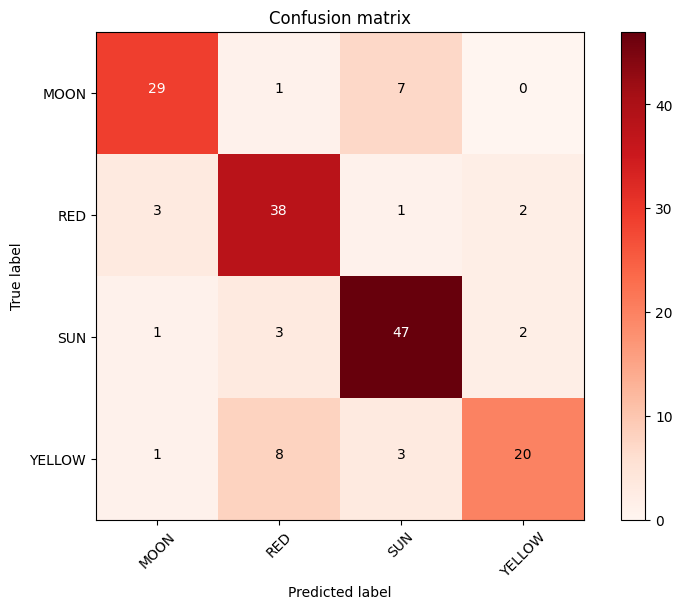

In [ ]:
# Confusion matrix

cm= confusion_matrix(y_true,y_pred)
classes = list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred))
plot_confusion_matrix(cm,classes, cmap=plt.cm.Reds)

Summary, this part assesses how well the model is performing by comparing its predictions to the true labels of the test data. Indeed, by looking at the actual values and the predicted ones, we can see how well our model performs on the test part. If the values matches and if the off diagonal values are not too high, then, it's a good model.
Because the higer values are on the diagonal, meaning that most are true positive and true negative. But, unexpectedly, we have to many mistakes between red and orange color / Sun and Moon, instead of between Sun and the colors. It may be mostly because of the images that are not really awesome especially with the color are not very distinguishable between red and orange.



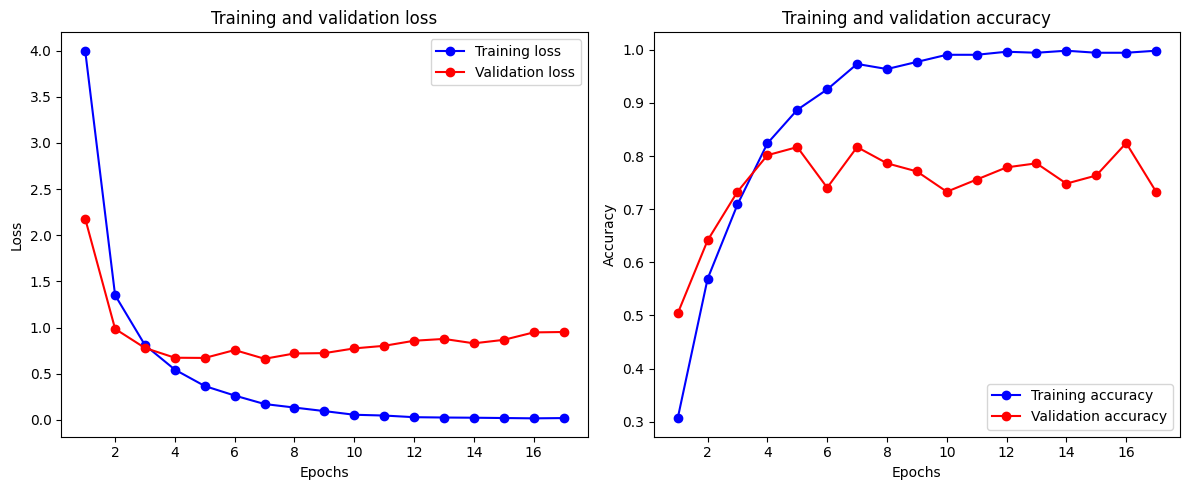

In [ ]:
plot_history(history)

* __Training and validation loss__:

 This plot shows how the loss (a measure of error) changes over training epochs for both the training and validation datasets. It helps to identify if the model is overfitting (performing well on training data but poorly on unseen data).

* __Training and validation accuracy__:

 This plot displays the accuracy of the model on the training and validation datasets over epochs. It helps to understand how well the model is learning and generalizing.

_________________________________________

 ✴ __Observations__ ✴

 In our case, on the left plot, the training loss decrease strongly from 1 epochs to stagnate after approximatively 6 epochs. Whereas, validation loss varies in the vicinity of 1. Only after 2 epochs of training, the training loss is lower than the validation loss, which means there's existence of overfitting in spite of good training(low training loss). This implies, the model doesn't performs well on the validation data(high validation data).

In [ ]:
'''import matplotlib.pyplot as plt
from PIL import Image

def display_predictions(test_generator, model, num_images=10):
    """Displays images with predicted and true labels."""
    fig, axes = plt.subplots(num_images // 5, 5, figsize=(15, 6))
    axes = axes.flatten()

    # Get class labels from the test generator
    class_labels = list(test_generator.class_indices.keys())

    for i in range(num_images):
        # Use next(test_generator) instead of test_generator.next()
        x, y = next(test_generator)  # Get a batch of images and labels
        image = x[0]  # Take the first image from the batch
        true_label = np.argmax(y[0])  # Get the true label

        # Make a prediction
        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_label = np.argmax(prediction)

        # Display the image with labels using class_labels
        axes[i].imshow(image)
        axes[i].set_title(f"True: {class_labels[true_label]}\nPredicted: {class_labels[predicted_label]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

display_predictions(test_generator, modelo, num_images=10)'''

'import matplotlib.pyplot as plt\nfrom PIL import Image\n\ndef display_predictions(test_generator, model, num_images=10):\n    """Displays images with predicted and true labels."""\n    fig, axes = plt.subplots(num_images // 5, 5, figsize=(15, 6))\n    axes = axes.flatten()\n\n    # Get class labels from the test generator\n    class_labels = list(test_generator.class_indices.keys())\n\n    for i in range(num_images):\n        # Use next(test_generator) instead of test_generator.next()\n        x, y = next(test_generator)  # Get a batch of images and labels\n        image = x[0]  # Take the first image from the batch\n        true_label = np.argmax(y[0])  # Get the true label\n\n        # Make a prediction\n        prediction = model.predict(np.expand_dims(image, axis=0))\n        predicted_label = np.argmax(prediction)\n\n        # Display the image with labels using class_labels\n        axes[i].imshow(image)\n        axes[i].set_title(f"True: {class_labels[true_label]}\nPredicted: {

The following part is another way to check if the model's predictions are good or not. (To see better for the people who doesn't know technicaal words and stuff in machine learning). In order to, we have made a function that show the images by specifying the real record name and the record that has been predicted by the model. This make easy to see if the model performs well or not with a couple of examples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


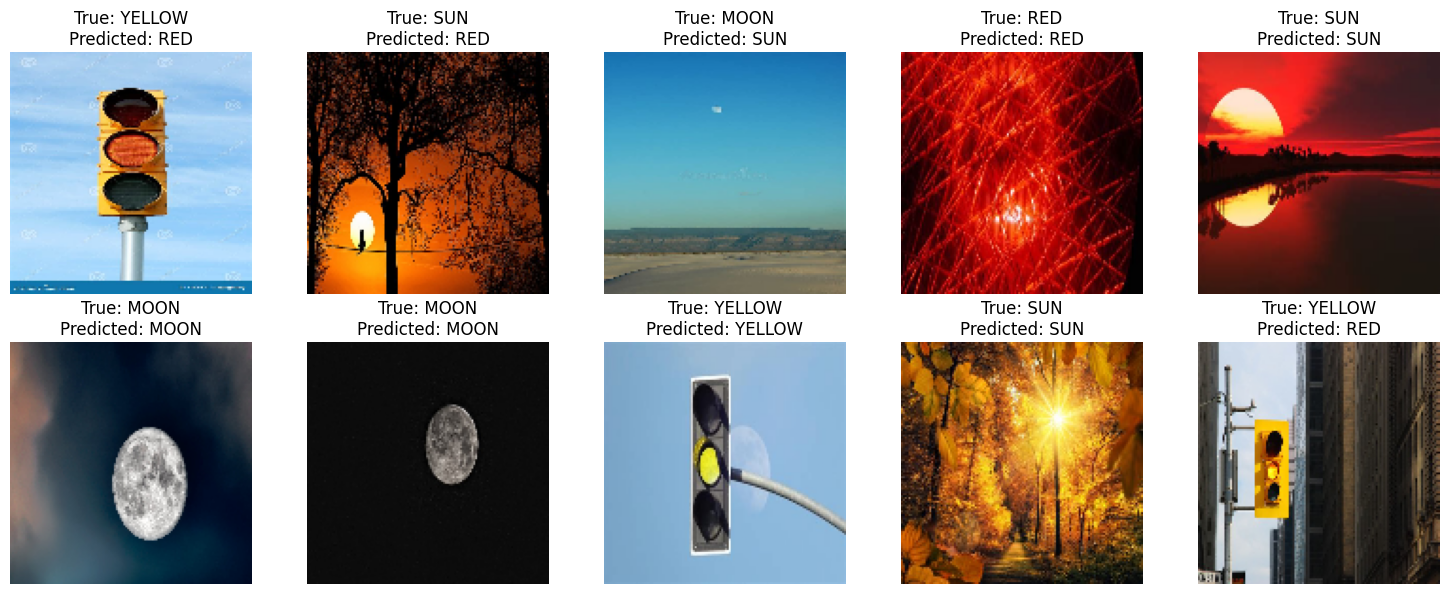

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def display_predictions(test_generator, model, num_images=10):
    """Displays images with predicted and true labels."""

    # Reset the generator before displaying images
    test_generator.reset()

    fig, axes = plt.subplots(num_images // 5, 5, figsize=(15, 6))
    axes = axes.flatten()

    class_labels = list(test_generator.class_indices.keys())

    for i in range(num_images):
        x, y = next(test_generator)

        # Handle potential batch size mismatch:
        # If num_images is larger than batch_size and
        # the generator loops back, break the loop to avoid duplicates
        if i >= num_images:
            break

        image = x[i % test_generator.batch_size] # Use modulo for image index
        true_label = np.argmax(y[i % test_generator.batch_size]) # Use modulo

        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_label = np.argmax(prediction)

        axes[i].imshow(image)
        axes[i].set_title(f"True: {class_labels[true_label]}\nPredicted: {class_labels[predicted_label]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Reset the generator before calling display_predictions
test_generator.reset()
display_predictions(test_generator, model, num_images=10)

The issue with the dataset found, the images provided are not very good because some images have other objects like for instance, red flowers on sun images or other stuff that shadows or obstruct the target object(SUN, MOON, YELLOW, RED). These sources of noise impedes for the model to correctly train.

More the information, more the data, more the model will train very well. Very good performance.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


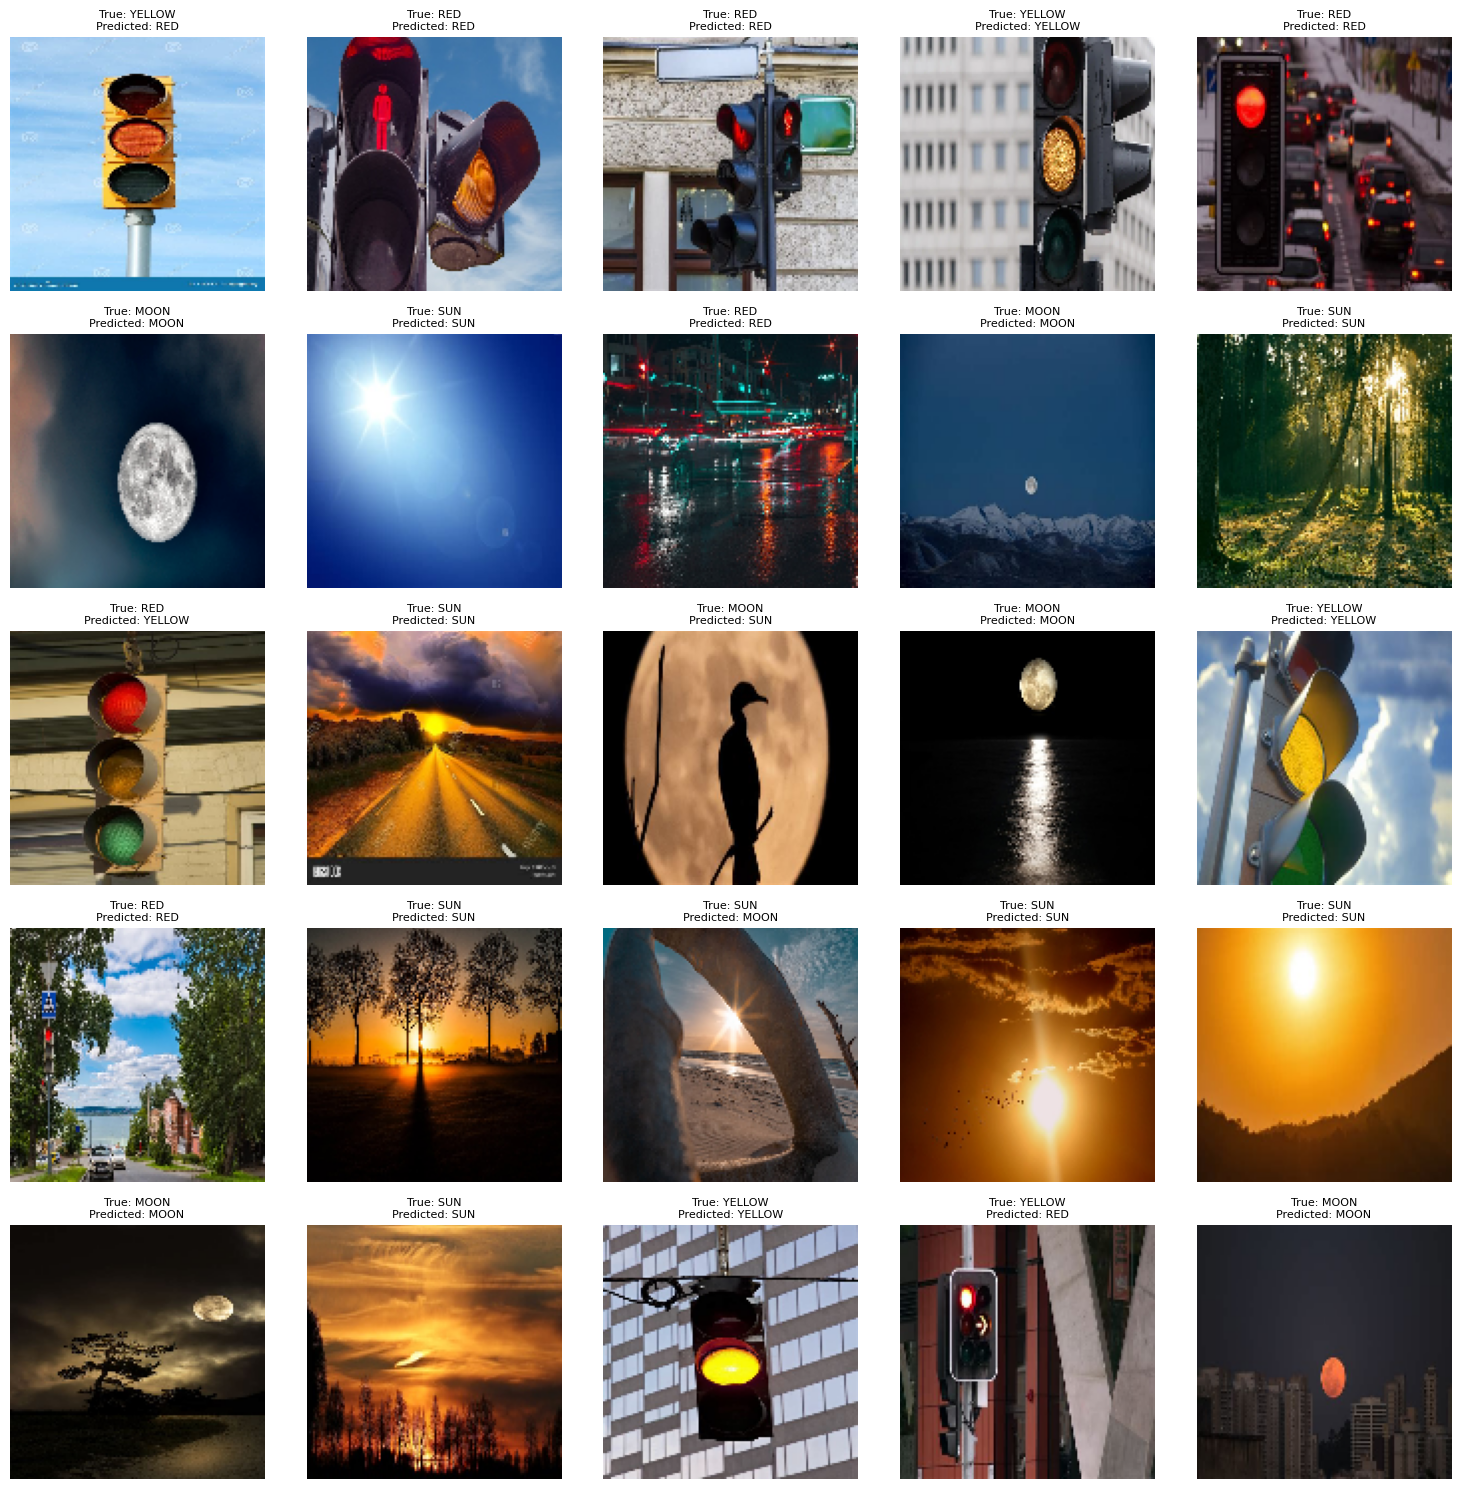

In [ ]:
# Function to display the predictions made by the model

def display_predictions(test_generator, model, num_images=25):
    """Displays images with predicted and true labels."""

    # Reset the generator before displaying images
    test_generator.reset()

    # Calculate the number of rows and columns for the subplots
    num_rows = (num_images + 4) // 5  # Ensure enough rows for 25 images
    num_cols = 5

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))  # Adjust figsize for better layout
    axes = axes.flatten()

    class_labels = list(test_generator.class_indices.keys())

    images_displayed = 0  # Keep track of displayed images
    while images_displayed < num_images:
        x, y = next(test_generator)  # Get a batch of images and labels
        batch_size = x.shape[0]  # Get the actual batch size (might be less in the last batch)

        for i in range(batch_size):
            if images_displayed >= num_images:
                break  # Stop if we've displayed enough images

            image = x[i]
            true_label = np.argmax(y[i])

            prediction = model.predict(np.expand_dims(image, axis=0))
            predicted_label = np.argmax(prediction)

            axes[images_displayed].imshow(image)
            axes[images_displayed].set_title(f"True: {class_labels[true_label]}\nPredicted: {class_labels[predicted_label]}", fontsize=8)
            axes[images_displayed].axis('off')

            images_displayed += 1

    # Hide any extra subplots
    for ax in axes[images_displayed:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with num_images=25
test_generator.reset()
display_predictions(test_generator, model, num_images=25)

In [ ]:
# Sequential model using Keras librairy

model12=Sequential()
model12.add(Conv2D(32, (3,3),input_shape=(128,128,3),activation='relu'))
model12.add(MaxPooling2D(pool_size=((2,2))))
model12.add(BatchNormalization())
model12.add(Flatten())
model12.add(Dense(128,activation='softmax'))
model12.add(Dense(50,activation='relu'))
model12.add(Dense(4,activation='softmax')) # The output layer with 4 neurons and softmax activation function
model12.compile(
    loss='categorical_crossentropy', # Use categorical_crossentropy for multi-class
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'] # accuracy metric
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
'''model12 = Sequential()
model12.add(Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3),kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(32, (3,3), activation='relu',))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))

model12.add(Conv2D(64, (3,3), activation='softmax',kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))


model12.add(Conv2D(128, (3,3), activation='relu',kernel_regularizer=L2(0.01)))
model12.add(BatchNormalization())
model12.add(MaxPooling2D(2,2))
model12.add(Dropout(0.2))
model12.add(Flatten())

model12.add(Dense(64,activation='relu'))
model12.add(BatchNormalization())
model12.add(Dense(4, activation='softmax')) # Change the output layer to 4 units with softmax
model12.compile(
    loss='categorical_crossentropy', # Use categorical_crossentropy for multi-class classification
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])'''

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [ ]:
history12 = model12.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 100
                   )

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3771 - loss: 1.3584 - val_accuracy: 0.3817 - val_loss: 1.3619 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 900ms/step - accuracy: 0.5349 - loss: 1.3131 - val_accuracy: 0.4351 - val_loss: 1.3356 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6054 - loss: 1.2707 - val_accuracy: 0.4962 - val_loss: 1.3068 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 854ms/step - accuracy: 0.6178 - loss: 1.2305 - val_accuracy: 0.4580 - val_loss: 1.2972 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 825ms/step - accuracy: 0.5734 - loss: 1.1980 - val_accuracy: 0.4275 - val_loss: 1.2922 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 842ms/step - accuracy: 0.5859 - loss: 1.1687 - val_accuracy: 0.4046 - val_loss: 1.2781 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 885ms/step - accuracy: 0.6142 - loss: 1

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step
Confusion matrix, without normalization


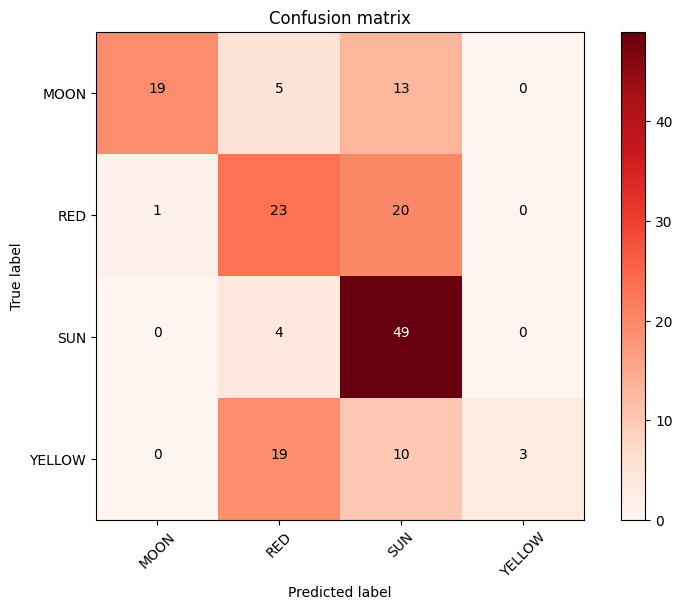

In [ ]:

# 1. Get predictions
result = model12.predict(test_generator, batch_size=batch_size, verbose=1)
y_pred = np.argmax(result, axis=1)  # Convert probabilities to class labels
y_true = test_generator.labels  # True labels

# 2. Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
classes = list(train_generator.class_indices.keys())  # Get class names

# 3. Plot the confusion matrix
plot_confusion_matrix(cm, classes, cmap=plt.cm.Reds)  # Use your existing plot function

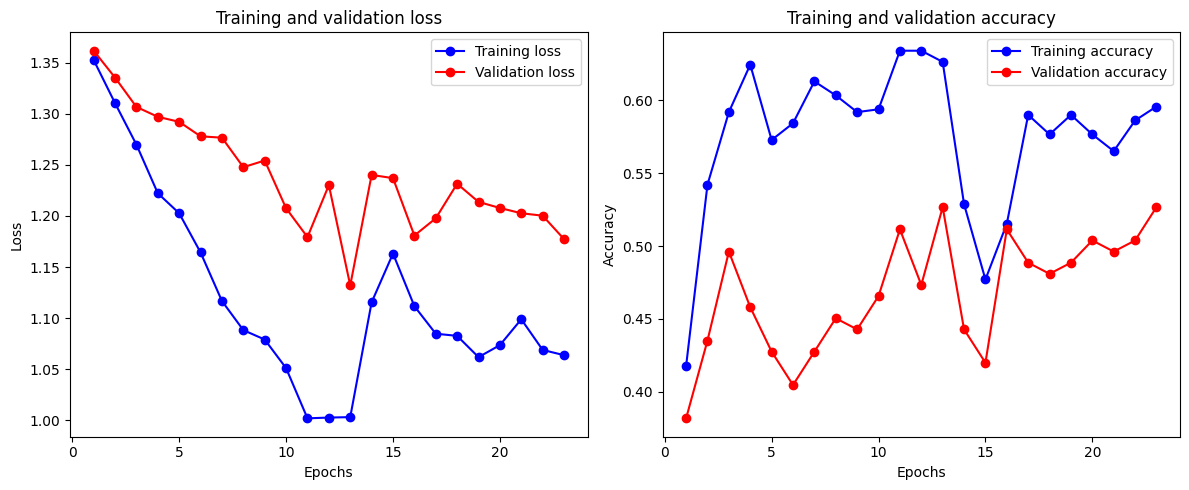

In [ ]:
plot_history(history12)

This model is a bit bad

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


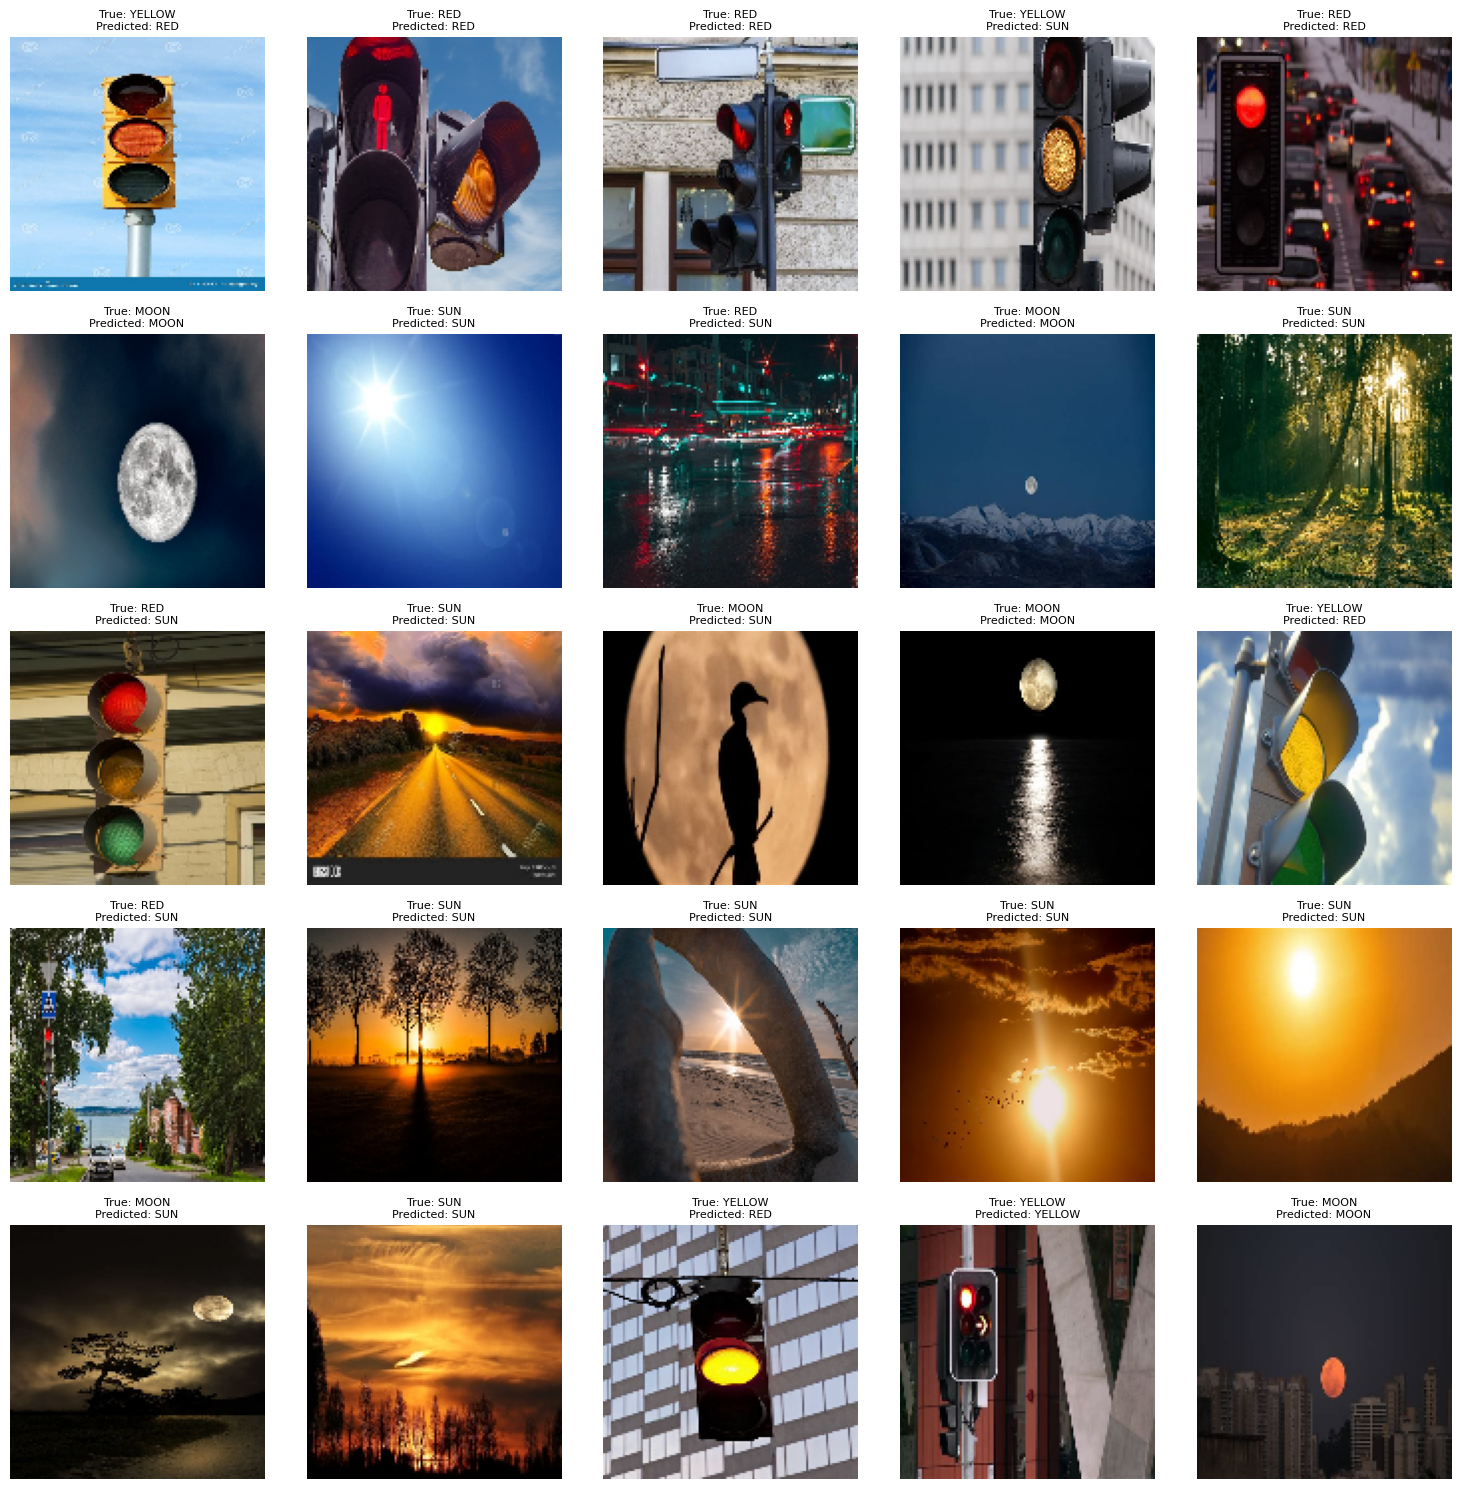

In [ ]:
# Function to display the predictions made by the model

def display_predictions(test_generator, model, num_images=25):
    """Displays images with predicted and true labels."""

    # Reset the generator before displaying images
    test_generator.reset()

    # Calculate the number of rows and columns for the subplots
    num_rows = (num_images + 4) // 5  # Ensure enough rows for 25 images
    num_cols = 5

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))  # Adjust figsize for better layout
    axes = axes.flatten()

    class_labels = list(test_generator.class_indices.keys())

    images_displayed = 0  # Keep track of displayed images
    while images_displayed < num_images:
        x, y = next(test_generator)  # Get a batch of images and labels
        batch_size = x.shape[0]  # Get the actual batch size (might be less in the last batch)

        for i in range(batch_size):
            if images_displayed >= num_images:
                break  # Stop if we've displayed enough images

            image = x[i]
            true_label = np.argmax(y[i])

            prediction = model12.predict(np.expand_dims(image, axis=0))
            predicted_label = np.argmax(prediction)

            axes[images_displayed].imshow(image)
            axes[images_displayed].set_title(f"True: {class_labels[true_label]}\nPredicted: {class_labels[predicted_label]}", fontsize=8)
            axes[images_displayed].axis('off')

            images_displayed += 1

    # Hide any extra subplots
    for ax in axes[images_displayed:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with num_images=25
test_generator.reset()
display_predictions(test_generator, model12, num_images=25)